In [1]:
#importing packages 

from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import json 
import numpy as np
import seaborn as sns

Importing the data

In [2]:
#Importing a CSV file and converting into pandas dataframe
df_covid=pd.read_csv("all-states-history.csv")
df_covid

,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2021-03-07,AK,305.0,NaN,0,NaN,1293.0,1293.0,33.0,0,...,1731628.0,0,NaN,NaN,NaN,NaN,NaN,0,1731628.0,0
1,2021-03-07,AL,10148.0,7963.0,-1,2185.0,45976.0,45976.0,494.0,0,...,2323788.0,2347,NaN,NaN,119757.0,NaN,2323788.0,2347,NaN,0
2,2021-03-07,AR,5319.0,4308.0,22,1011.0,14926.0,14926.0,335.0,11,...,2736442.0,3380,NaN,NaN,NaN,481311.0,NaN,0,2736442.0,3380
3,2021-03-07,AS,0.0,NaN,0,NaN,NaN,NaN,NaN,0,...,2140.0,0,NaN,NaN,NaN,NaN,NaN,0,2140.0,0
4,2021-03-07,AZ,16328.0,14403.0,5,1925.0,57907.0,57907.0,963.0,44,...,7908105.0,45110,580569.0,NaN,444089.0,NaN,3842945.0,14856,7908105.0,45110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20775,2020-01-17,WA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
20776,2020-01-16,WA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
20777,2020-01-15,WA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
20778,2020-01-14,WA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0


In [3]:
# Replace all the NaN with 0
df_covid=df_covid.fillna(0)

#Renaming the state column to States
df_covid=df_covid.rename(columns={'state':'States'})

df_covid


,date,States,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2021-03-07,AK,305.0,0.0,0,0.0,1293.0,1293.0,33.0,0,...,1731628.0,0,0.0,0.0,0.0,0.0,0.0,0,1731628.0,0
1,2021-03-07,AL,10148.0,7963.0,-1,2185.0,45976.0,45976.0,494.0,0,...,2323788.0,2347,0.0,0.0,119757.0,0.0,2323788.0,2347,0.0,0
2,2021-03-07,AR,5319.0,4308.0,22,1011.0,14926.0,14926.0,335.0,11,...,2736442.0,3380,0.0,0.0,0.0,481311.0,0.0,0,2736442.0,3380
3,2021-03-07,AS,0.0,0.0,0,0.0,0.0,0.0,0.0,0,...,2140.0,0,0.0,0.0,0.0,0.0,0.0,0,2140.0,0
4,2021-03-07,AZ,16328.0,14403.0,5,1925.0,57907.0,57907.0,963.0,44,...,7908105.0,45110,580569.0,0.0,444089.0,0.0,3842945.0,14856,7908105.0,45110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20775,2020-01-17,WA,0.0,0.0,0,0.0,0.0,0.0,0.0,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
20776,2020-01-16,WA,0.0,0.0,0,0.0,0.0,0.0,0.0,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
20777,2020-01-15,WA,0.0,0.0,0,0.0,0.0,0.0,0.0,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
20778,2020-01-14,WA,0.0,0.0,0,0.0,0.0,0.0,0.0,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0


In [4]:
#Performed a groupby() function by State. Making it the new index, then using the sum() function add all the values by state. 
#This causes the date column to be dropped. 
by_state=df_covid.groupby('States').sum()
by_state

#Reset the Index
by_state=by_state.reset_index()
by_state

,States,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,AK,31486.0,14454.0,305,0.0,157626.0,157626.0,17804.0,1293,0.0,...,2.082177e+08,1731620,0.0,0.0,0.0,0.0,0.000000e+00,0,2.082177e+08,1731628
1,AL,1038241.0,897681.0,10148,136027.0,6133645.0,6133645.0,404951.0,45976,526982.0,...,3.662777e+08,2323788,0.0,0.0,15188638.0,0.0,3.662777e+08,2323788,0.000000e+00,0
2,AR,601561.0,468918.0,5319,82996.0,2017792.0,2017792.0,188044.0,14926,344.0,...,3.685376e+08,2736436,0.0,512573.0,0.0,34473042.0,0.000000e+00,0,3.685376e+08,2736442
3,AS,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,...,4.445310e+05,2140,0.0,0.0,0.0,0.0,0.000000e+00,0,4.445310e+05,2140
4,AZ,1918434.0,1710791.0,16328,159627.0,7425807.0,7425807.0,640831.0,57903,0.0,...,9.190266e+08,7908072,580569.0,0.0,86926215.0,0.0,5.293555e+08,3842945,9.190266e+08,7908105
5,CA,5733089.0,0.0,54124,0.0,0.0,0.0,2653612.0,0,0.0,...,5.833385e+09,49645499,0.0,0.0,0.0,0.0,0.000000e+00,0,5.833385e+09,49646014
6,CO,908462.0,748037.0,5989,135029.0,3478740.0,3478740.0,231196.0,23904,0.0,...,7.034087e+08,6415123,59136195.0,0.0,0.0,0.0,3.669939e+08,2616541,0.000000e+00,0
7,CT,1584666.0,1217530.0,7704,281155.0,3575391.0,3575391.0,214270.0,12257,0.0,...,7.782720e+08,6520363,0.0,21296260.0,0.0,0.0,0.000000e+00,0,7.782720e+08,6520366
8,DC,207067.0,0.0,1030,0.0,0.0,0.0,58996.0,0,0.0,...,1.546670e+08,1261357,0.0,0.0,0.0,0.0,6.874351e+07,441942,0.000000e+00,0
9,DE,228375.0,202801.0,1473,25574.0,0.0,0.0,61269.0,0,0.0,...,1.745888e+08,1431942,0.0,0.0,0.0,0.0,9.695583e+07,633424,0.000000e+00,0


In [5]:
#Changed the initials of the States to their full names, using the .iat[] to locate the value by their position on the chart. 
by_state.iat[0,0]='Alaska'
by_state.iat[1,0]='Alabama'
by_state.iat[2,0]='Arkansas'
by_state.iat[3,0]='American Somoa'
by_state.iat[4,0]='Arizona'
by_state.iat[5,0]='California'
by_state.iat[6,0]='Colorado'
by_state.iat[7,0]='Connecticut'
by_state.iat[8,0]='District of Columbia'
by_state.iat[9,0]='Delaware'
by_state.iat[10,0]='Florida'
by_state.iat[11,0]='Georgia'
by_state.iat[12,0]='Guam'
by_state.iat[13,0]='Hawaii'
by_state.iat[14,0]='Iowa'
by_state.iat[15,0]='Idaho'
by_state.iat[16,0]='Illinois'
by_state.iat[17,0]='Indiana'
by_state.iat[18,0]='Kansas'
by_state.iat[19,0]='Kentucky'
by_state.iat[20,0]='Louisiana'
by_state.iat[21,0]='Massachusetts'
by_state.iat[22,0]='Maryland'
by_state.iat[23,0]='Maine'
by_state.iat[24,0]='Michigan'
by_state.iat[25,0]='Minnesota'
by_state.iat[26,0]='Missouri'
by_state.iat[27,0]='Northern Mariana Islands'
by_state.iat[28,0]='Mississippi'
by_state.iat[29,0]='Montana'
by_state.iat[30,0]='North Carolina'
by_state.iat[31,0]='North Dakota'
by_state.iat[32,0]='Nebraska'
by_state.iat[33,0]='New Hampshire'
by_state.iat[34,0]='New Jersey'
by_state.iat[35,0]='New Mexico'
by_state.iat[36,0]='Nevada'
by_state.iat[37,0]='New York'
by_state.iat[38,0]='Ohio'
by_state.iat[39,0]='Oklahoma'
by_state.iat[40,0]='Oregon'
by_state.iat[41,0]='Pennsylvania'
by_state.iat[42,0]='Puerto Rico'
by_state.iat[43,0]='Rhode Island'
by_state.iat[44,0]='South Carolina'
by_state.iat[45,0]='South Dakota'
by_state.iat[46,0]='Tennessee'
by_state.iat[47,0]='Texas'
by_state.iat[48,0]='Utah'
by_state.iat[49,0]='Virginia'
by_state.iat[50,0]='Virgin Islands (U.S.)'
by_state.iat[51,0]='Vermont'
by_state.iat[52,0]='Washington'
by_state.iat[53,0]='Wisconsin'
by_state.iat[54,0]='West Virginia'
by_state.iat[55,0]='Wyoming'

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55]), <a list of 56 Text major ticklabel objects>)

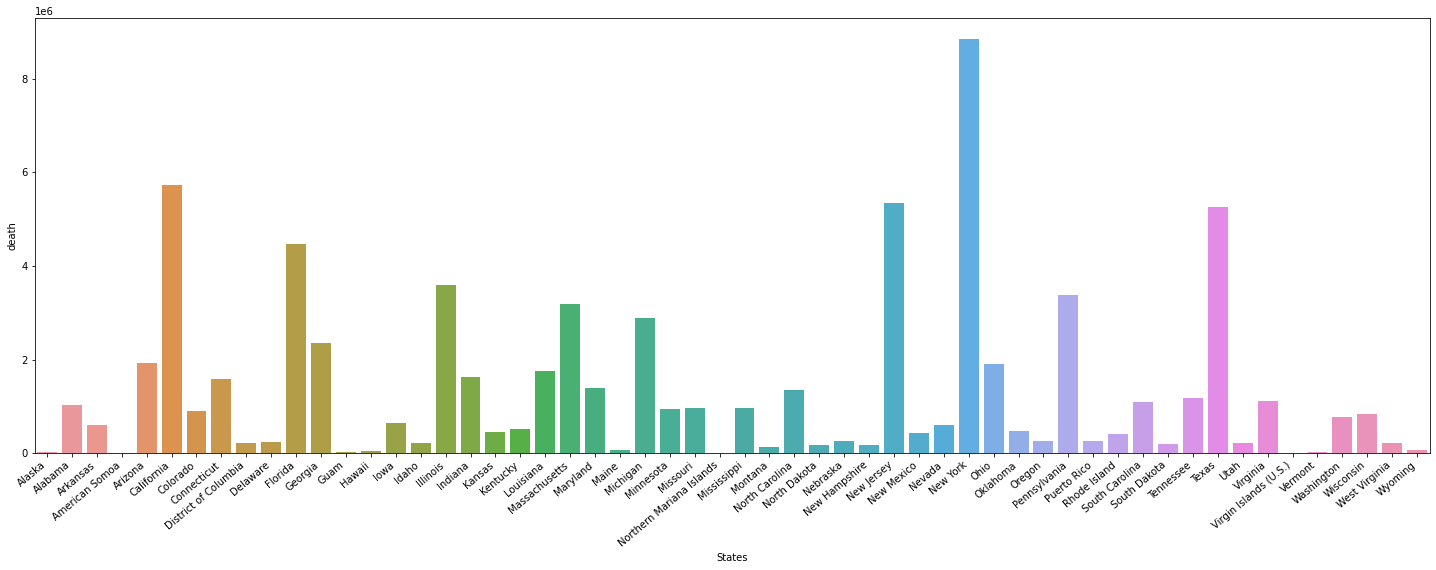

In [6]:
#Plotting the number of deaths per state over the year since the start of the Covid-19 pandemic
sns.barplot(x='States',y='death', data=by_state, ci=None)

current_graph=plt.gcf()

#The figure size is set to 25 inches by 8 inches
current_graph.set_size_inches(25,8)

#To avoid the x axis labels to overlap, the labels were rotated to 40 degrees and alignment shifted to the right
plt.xticks(rotation=40, horizontalalignment='right')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55]), <a list of 56 Text major ticklabel objects>)

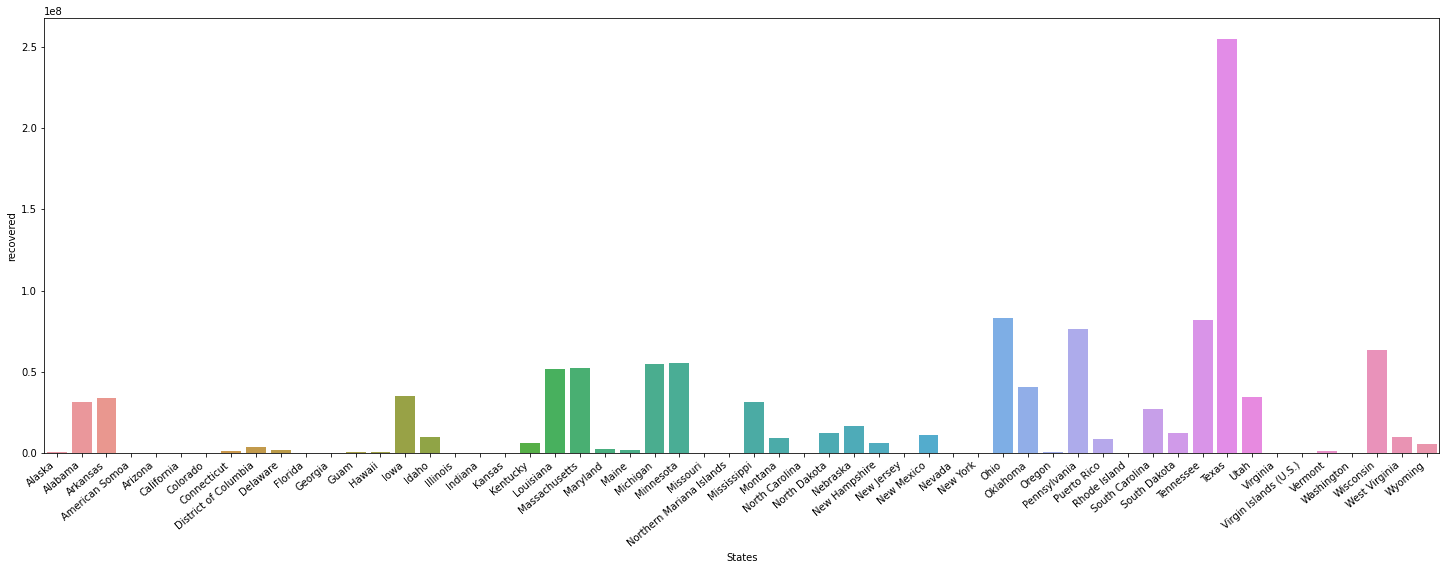

In [132]:
#Plotting the number of recovered per state over the year since the start of the Covid-19 pandemic
sns.barplot(x='States',y='recovered', data=by_state, ci=None)

current_graph=plt.gcf()

#The figure size is set to 25 inches by 8 inches
current_graph.set_size_inches(25,8)

#To avoid the x axis labels to overlap, the labels were rotated to 40 degrees and alignment shifted to the right
plt.xticks(rotation=40, horizontalalignment='right')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55]), <a list of 56 Text major ticklabel objects>)

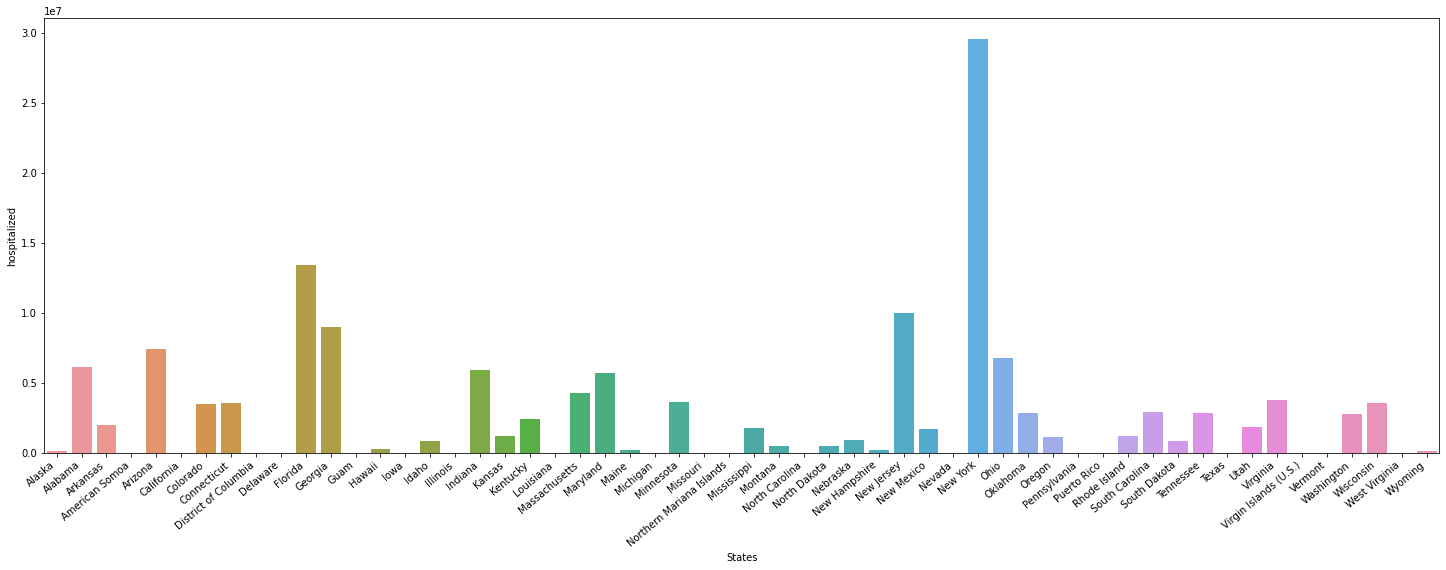

In [134]:
#Plotting the number of hostpiatlizations per state over the year since the start of the Covid-19 pandemic
sns.barplot(x='States',y='hospitalized', data=by_state, ci=None)

current_graph=plt.gcf()

#The figure size is set to 25 inches by 8 inches
current_graph.set_size_inches(25,8)

#To avoid the x axis labels to overlap, the labels were rotated to 40 degrees and alignment shifted to the right
plt.xticks(rotation=40, horizontalalignment='right')

In [7]:
#Parsing data from a Wikipedia page that contains an obesity chart. The following the code will extract the chart and convert it to pandas dataframe. 
dfs = pd.read_html('https://en.wikipedia.org/wiki/Obesity_in_the_United_States')
#[0] indicates the chart that is being parsed from the link
df_obesity=dfs[0]
df_obesity

,"States, district, & territories",Obesity rank,Obese adults (mid-2000s),Obese adults (2020)[79][74][80],Overweight (incl. obese) adults(mid-2000s),Obese children and adolescents(mid-2000s)[81]
0,Alabama,5,30.1%,36.3%,65.4%,16.7%
1,Alaska,9,27.3%,34.2%,64.5%,11.1%
2,American Samoa,—,—,75%[78],95%[82],35%[78][83]
3,Arizona,30,23.3%,29.5%,59.5%,12.2%
4,Arkansas,7,28.1%,35.0%,64.7%,16.4%
5,California,48,23.1%,25.1%,59.4%,13.2%
6,Colorado,51,21.0%,22.6%,55.0%,9.9%
7,Connecticut,42,20.8%,26.9%,58.7%,12.3%
8,Delaware,23,25.9%,31.8%,63.9%,22.8%
9,District of Columbia,50,22.1%,23.0%,55.0%,14.8%


In [8]:
#Droping Columns 'Obesity rank','Obese adults (mid-2000s)','Overweight (incl. obese) adults(mid-2000s)','Obese children and adolescents(mid-2000s)[81]'
#axis=1 is indicates its a column

df_obesity.drop(['Obesity rank','Obese adults (mid-2000s)',
                 'Overweight (incl. obese) adults(mid-2000s)',
                 'Obese children and adolescents(mid-2000s)[81]'],axis=1, inplace=True)


In [9]:
# ['Obese adults (2020)[79][74][80]'] is applied with the lambda function. lambda is used for any number of arguments but has one expression
#lambda is used in a flow through loop to remove '—' if 0 percent is '—'. 0 replaces '—'

df_obesity['Obese adults (2020)[79][74][80]']=df_obesity['Obese adults (2020)[79][74][80]'].apply(lambda percent: 0 if percent == '—' else percent)


In [10]:
#Changing the names of the columns to 'States' and 'Obese Adults in Percentage (2020)'
df_obesity=df_obesity.rename(columns={'States, district, & territories':'States',
                                      'Obese adults (2020)[79][74][80]':'Obese Adults in Percentage (2020)'})

In [11]:
#Removing [78] for American Samoa using iat[]
df_obesity.iat[2,1]='75.0%'

#Remove all of  % from values under the Obese Adults in Percentage column
df_obesity['Obese Adults in Percentage (2020)'] = df_obesity['Obese Adults in Percentage (2020)'].str.replace('%', '')

#Changes the values from the Obese Adults in Percentage (2020) column from objects to a float
df_obesity['Obese Adults in Percentage (2020)']=df_obesity['Obese Adults in Percentage (2020)'].astype(float)

In [12]:
#Chech to see what type of value the charts are. 
df_obesity.dtypes

States                                object
Obese Adults in Percentage (2020)    float64
dtype: object

In [13]:

df_obesity

,States,Obese Adults in Percentage (2020)
0,Alabama,36.3
1,Alaska,34.2
2,American Samoa,75.0
3,Arizona,29.5
4,Arkansas,35.0
5,California,25.1
6,Colorado,22.6
7,Connecticut,26.9
8,Delaware,31.8
9,District of Columbia,23.0


In [15]:
#Importing an EXCEL file and converting into a pandas dataframe
#https://www.census.gov/data/datasets/time-series/demo/popest/2010s-state-total.html

df_pop=pd.read_excel('nst-est2019-01.xlsx')
df_pop

,table with row headers in column A and column headers in rows 3 through 4. (leading dots indicate sub-parts),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Table 1. Annual Estimates of the Resident Popu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Geographic Area,2010-04-01 00:00:00,NaN,Population Estimate (as of July 1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Census,Estimates Base,2010,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
3,United States,308745538,308758105,309321666,311556874.0,313830990.0,315993715.0,318301008.0,320635163.0,322941311.0,324985539.0,326687501.0,328239523.0
4,Northeast,55317240,55318443,55380134,55604223.0,55775216.0,55901806.0,56006011.0,56034684.0,56042330.0,56059240.0,56046620.0,55982803.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Note: The estimates are based on the 2010 Cens...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,Suggested Citation:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,Table 1. Annual Estimates of the Resident Popu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,"Source: U.S. Census Bureau, Population Division",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#This code will remove/drop the unnecessay rows. Cleaning up the excel file, axis=0 refers to rows.
df_pop.drop([0,1,61,62,63,64,64,65,59],axis=0, inplace=True)


In [17]:
# The orginal name of the columns will be replaced with new name. The new names for the columns will be renamed from row 2 as a reference. 

df_pop1=df_pop.rename(columns={'table with row headers in column A and column headers in rows 3 through 4. (leading dots indicate sub-parts)':'States'})
df_pop2=df_pop1.rename(columns={'Unnamed: 1':'Census','Unnamed: 2':'Estimates Base',
                                'Unnamed: 3':'2010','Unnamed: 4':'2011','Unnamed: 5':'2012',
                                'Unnamed: 6':'2013','Unnamed: 7':'2014',
                                'Unnamed: 8':'2015', 'Unnamed: 9':'2016','Unnamed: 10':'2017', 
                                'Unnamed: 11':'2018','Unnamed: 12':'2019'})

In [18]:
# Rows 2,4,5,6,7 will be dropped since they are not needed, axis=0 refers to rows. 
df_pop2.drop([2,4,5,6,7],axis=0, inplace=True)



In [19]:
# removing the period from the states name under the States column 
df_pop2['States']=df_pop2['States'].str.replace(r'\W',"")

In [20]:
#reset the index because of the .drop function caused the index to be out of order. This caused the old index to be created into a new colummn.
df_pop2=df_pop2.reset_index()

# Drop the old index column 
df_pop2.drop('index',axis=1, inplace=True)

In [21]:
#Add in a space between the two-name states. Example SouthCarolina becomes South Carolina. Use .iat[] to find the position on the states to change the name
df_pop2.iat[0,0]='United States'
df_pop2.iat[9,0]='District of Columbia'
df_pop2.iat[30,0]='New Hampshire'
df_pop2.iat[31,0]='New Jersey'
df_pop2.iat[32,0]='New Mexico'
df_pop2.iat[33,0]='New York'
df_pop2.iat[34,0]='North Carolina'
df_pop2.iat[35,0]='North Dakota'
df_pop2.iat[40,0]='Rhode Island'
df_pop2.iat[41,0]='South Carolina'
df_pop2.iat[42,0]='South Dakota'
df_pop2.iat[49,0]='West Virginia'
df_pop2.iat[52,0]='Puerto Rico'

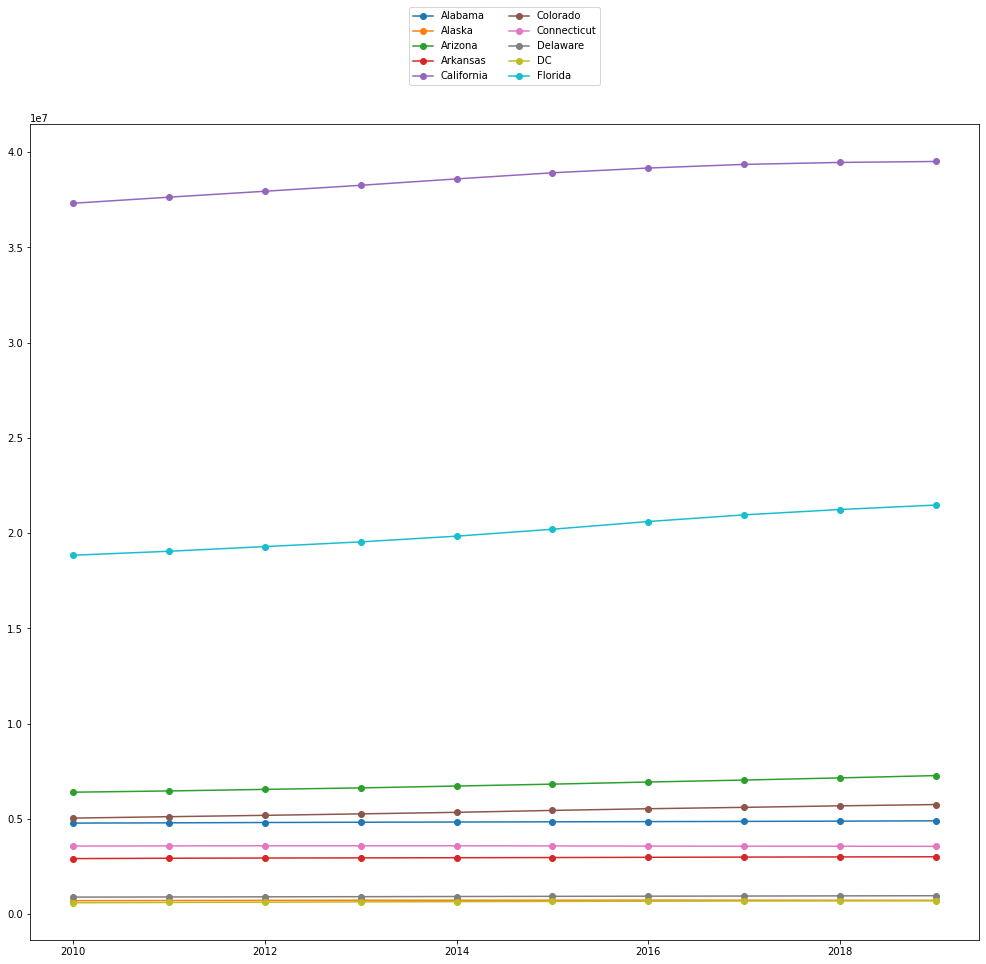

In [22]:
#Plotting the multiple line graph. the years are x axis 

plt.figure(figsize=(17,15))
years=[2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]

#Use the .loc[] to find the position of the state on the chart, then call for the the population count from years 2010 to 2019
#The population count that is pulled from set range of years will be the y axis
Alabama=[4785437,4799069.0,4815588.0,4830081.0,4841799.0,4852347.0,4863525.0,4874486.0,4887681.0,4903185.0]
Alaska=[713910,722128.0,730443.0,737068.0,736283.0,737498.0,741456.0,739700.0,735139.0,731545.0]
Arizona=df_pop2.loc[3,'2010':'2019']
Arkansas=df_pop2.loc[4,'2010':'2019']
California=df_pop2.loc[5,'2010':'2019']
Colorado=df_pop2.loc[6,'2010':'2019']
Connecticut=df_pop2.loc[7,'2010':'2019']
Delaware=df_pop2.loc[8,'2010':'2019']
DC=df_pop2.loc[9,'2010':'2019']
Florida=df_pop2.loc[10,'2010':'2019']



#plotting the line graph x=years, y=population  count from the years 2010-2019, Label='state', marker shows the shape of the point where the population is at 
plt.plot(years,Alabama, label='Alabama',marker='o')
plt.plot(years,Alaska,label= 'Alaska',marker='o')
plt.plot(years,Arizona,label='Arizona',marker='o')
plt.plot(years, Arkansas, label='Arkansas',marker='o')
plt.plot(years,California, label='California',marker='o')
plt.plot(years, Colorado, label='Colorado',marker='o')
plt.plot(years,Connecticut,label='Connecticut',marker='o')
plt.plot(years,Delaware,label='Delaware',marker='o')
plt.plot(years,DC,label='DC',marker='o')
plt.plot(years,Florida,label='Florida',marker='o')




plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=2)

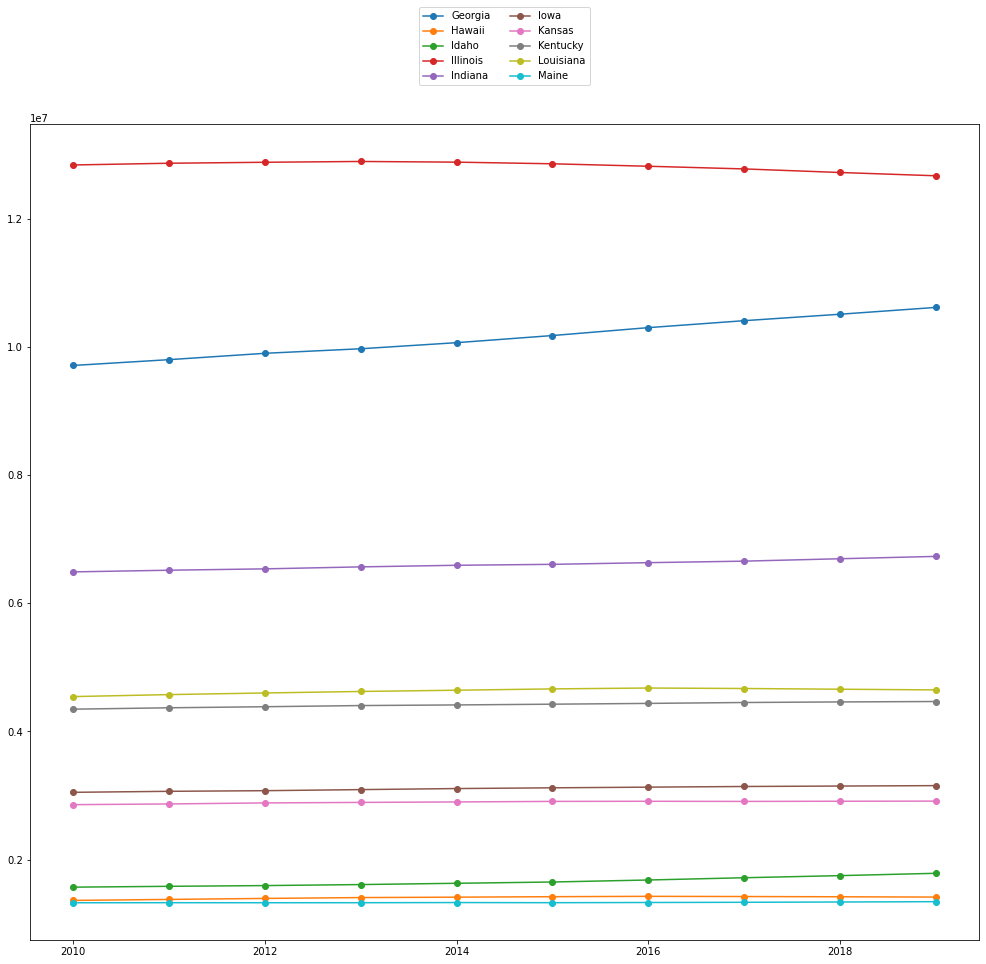

In [23]:
#Constructed figure size and set years and the x axis
plt.figure(figsize=(17,15))
years=[2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]


#Use the .loc[] to find the position of the state on the chart, then call for the the population count from years 2010 to 2019
#The population count that is pulled from set range of years will be the y axis
Georgia=df_pop2.loc[11,'2010':'2019']
Hawaii=df_pop2.loc[12,'2010':'2019']
Idaho=df_pop2.loc[13,'2010':'2019']
Illinois=df_pop2.loc[14,'2010':'2019']
Indiana=df_pop2.loc[15,'2010':'2019']
Iowa=df_pop2.loc[16,'2010':'2019']
Kansas=df_pop2.loc[17,'2010':'2019']
Kentucky=df_pop2.loc[18,'2010':'2019']
Louisiana=df_pop2.loc[19,'2010':'2019']
Maine=df_pop2.loc[20,'2010':'2019']



#plotting the line graph x=years, y=population  count from the years 2010-2019, Label='state', marker shows the shape of the point where the population is at plt.plot(years,Georgia,label='Georgia',marker='o')
plt.plot(years,Hawaii,label='Hawaii',marker='o')
plt.plot(years, Idaho, label='Idaho',marker='o')
plt.plot(years,Illinois, label='Illinois',marker='o')
plt.plot(years,Indiana,label='Indiana',marker='o')
plt.plot(years,Iowa,label='Iowa',marker='o')
plt.plot(years,Kansas,label='Kansas',marker='o')
plt.plot(years,Kentucky,label='Kentucky',marker='o')
plt.plot(years,Louisiana,label='Louisiana',marker='o')
plt.plot(years,Maine,label='Maine',marker='o')

plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=2)

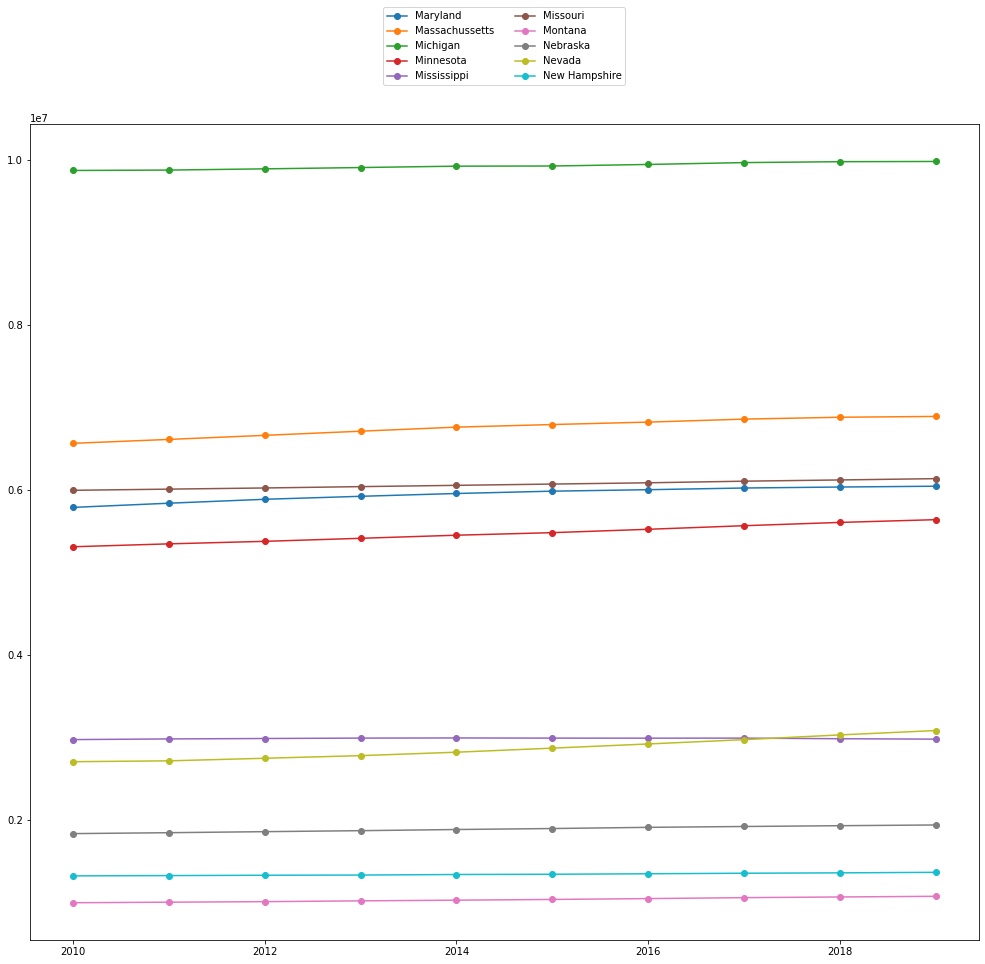

In [24]:
#Constructed figure size and set years and the x axis
plt.figure(figsize=(17,15))
years=[2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]


#Use the .loc[] to find the position of the state on the chart, then call for the the population count from years 2010 to 2019
#The population count that is pulled from set range of years will be the y axis

Maryland=df_pop2.loc[21,'2010':'2019']
Massachussetts=df_pop2.loc[22,'2010':'2019']
Michigan=df_pop2.loc[23,'2010':'2019']
Minnesota=df_pop2.loc[24,'2010':'2019']
Mississippi=df_pop2.loc[25,'2010':'2019']
Missouri=df_pop2.loc[26,'2010':'2019']
Montana=df_pop2.loc[27,'2010':'2019']
Nebraska=df_pop2.loc[28,'2010':'2019']
Nevada=df_pop2.loc[29,'2010':'2019']
New_Hampshire=df_pop2.loc[30,'2010':'2019']

#plotting the line graph x=years, y=population  count from the years 2010-2019, Label='state', marker shows the shape of the point where the population is at 
plt.plot(years,Maryland,label='Maryland',marker='o')
plt.plot(years,Massachussetts,label='Massachussetts',marker='o')
plt.plot(years,Michigan,label='Michigan',marker='o')
plt.plot(years,Minnesota,label='Minnesota',marker='o')
plt.plot(years,Mississippi,label='Mississippi',marker='o')
plt.plot(years,Missouri,label='Missouri',marker='o')
plt.plot(years,Montana,label='Montana',marker='o')
plt.plot(years,Nebraska,label='Nebraska',marker='o')
plt.plot(years,Nevada,label='Nevada',marker='o')
plt.plot(years,New_Hampshire,label='New Hampshire',marker='o')

plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=2)

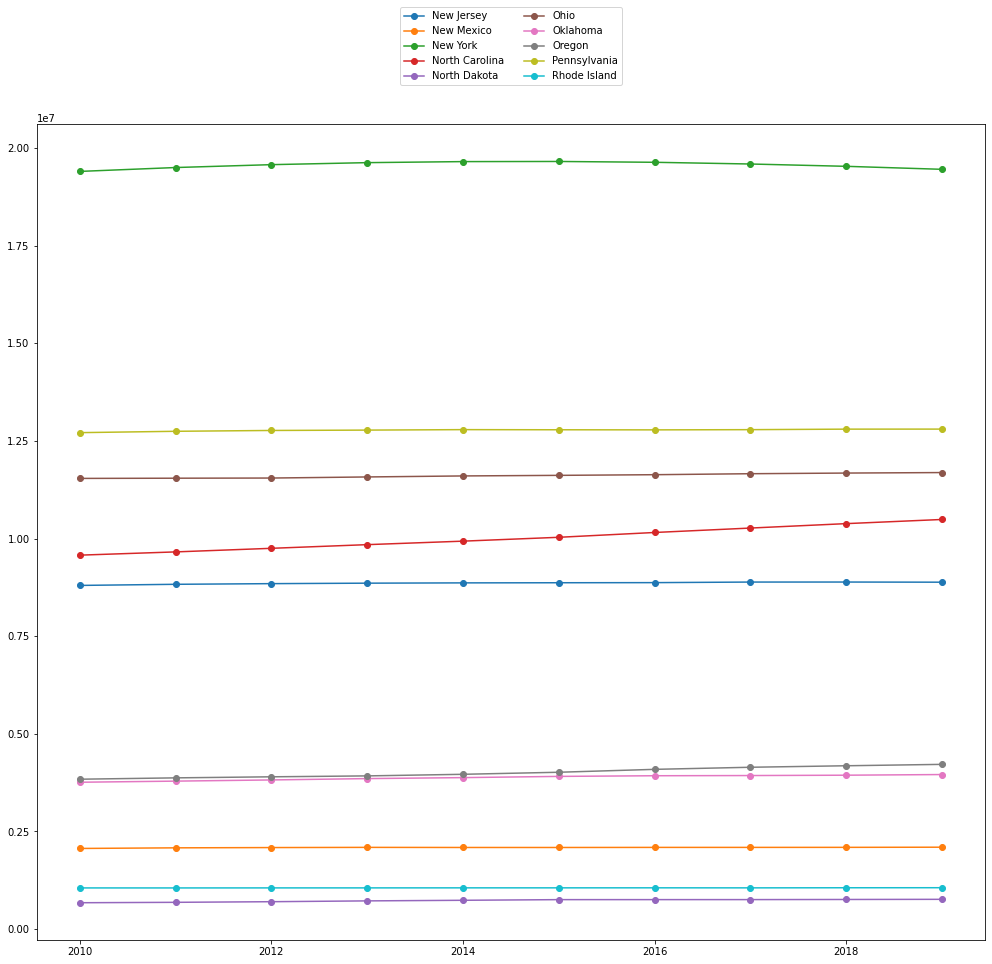

In [25]:
#Constructed figure size and set years and the x axis
plt.figure(figsize=(17,15))
years=[2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]

#Use the .loc[] to find the position of the state on the chart, then call for the the population count from years 2010 to 2019
#The population count that is pulled from set range of years will be the y axis

New_Jersey=df_pop2.loc[31,'2010':'2019']
New_Mexico=df_pop2.loc[32,'2010':'2019']
New_York=df_pop2.loc[33,'2010':'2019']
North_Carolina=df_pop2.loc[34,'2010':'2019']
North_Dakota=df_pop2.loc[35,'2010':'2019']
Ohio=df_pop2.loc[36,'2010':'2019']
Oklahoma=df_pop2.loc[37,'2010':'2019']
Oregon=df_pop2.loc[38,'2010':'2019']
Pennsylvania=df_pop2.loc[39,'2010':'2019']
Rhode_Island=df_pop2.loc[40,'2010':'2019']

#plotting the line graph x=years, y=population  count from the years 2010-2019, Label='state', marker shows the shape of the point where the population is at 
plt.plot(years,New_Jersey,label='New Jersey',marker='o')
plt.plot(years,New_Mexico,label='New Mexico',marker='o')
plt.plot(years,New_York,label='New York',marker='o')
plt.plot(years,North_Carolina, label='North Carolina',marker='o')
plt.plot(years,North_Dakota, label='North Dakota',marker='o')
plt.plot(years,Ohio,label='Ohio',marker='o')
plt.plot(years,Oklahoma,label='Oklahoma',marker='o')
plt.plot(years,Oregon,label='Oregon',marker='o')
plt.plot(years,Pennsylvania,label='Pennsylvania',marker='o')
plt.plot(years,Rhode_Island,label='Rhode Island',marker='o')

plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=2)

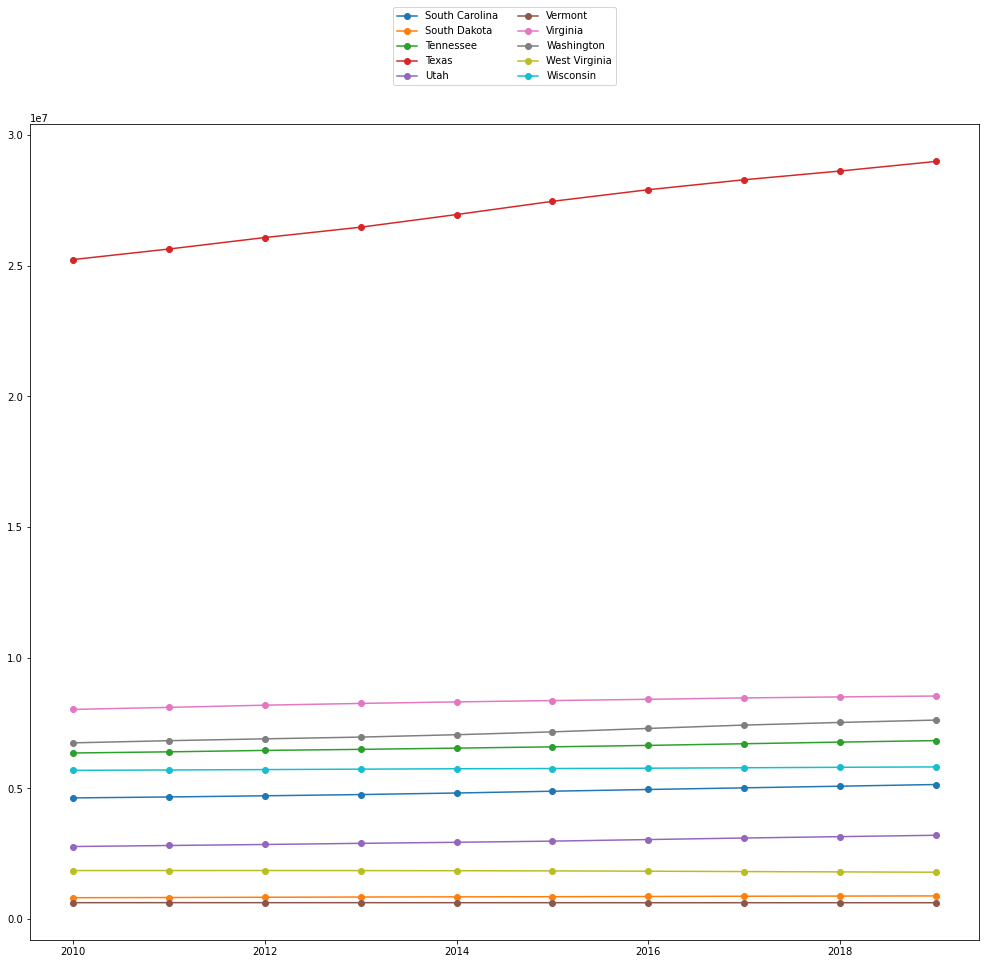

In [26]:
#Constructed figure size and set years and the x axis
plt.figure(figsize=(17,15))
years=[2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]

#Use the .loc[] to find the position of the state on the chart, then call for the the population count from years 2010 to 2019
#The population count that is pulled from set range of years will be the y axis

South_Carolina=df_pop2.loc[41,'2010':'2019']
South_Dakota=df_pop2.loc[42,'2010':'2019']
Tennessee=df_pop2.loc[43,'2010':'2019']
Texas=df_pop2.loc[44,'2010':'2019']
Utah=df_pop2.loc[45,'2010':'2019']
Vermont=df_pop2.loc[46,'2010':'2019']
Virginia=df_pop2.loc[47,'2010':'2019']
Washington=df_pop2.loc[48,'2010':'2019']
West_Virginia=df_pop2.loc[49,'2010':'2019']
Wisconsin=df_pop2.loc[50,'2010':'2019']

#plotting the line graph x=years, y=population  count from the years 2010-2019, Label='state', marker shows the shape of the point where the population is at 
plt.plot(years,South_Carolina, label='South Carolina',marker='o')
plt.plot(years,South_Dakota, label='South Dakota',marker='o')
plt.plot(years,Tennessee, label='Tennessee',marker='o')
plt.plot(years,Texas,label='Texas',marker='o')
plt.plot(years,Utah,label='Utah',marker='o')
plt.plot(years,Vermont,label='Vermont',marker='o')
plt.plot(years,Virginia,label='Virginia',marker='o')
plt.plot(years,Washington,label='Washington',marker='o')
plt.plot(years,West_Virginia,label='West Virginia',marker='o')
plt.plot(years,Wisconsin,label='Wisconsin',marker='o')

plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=2)

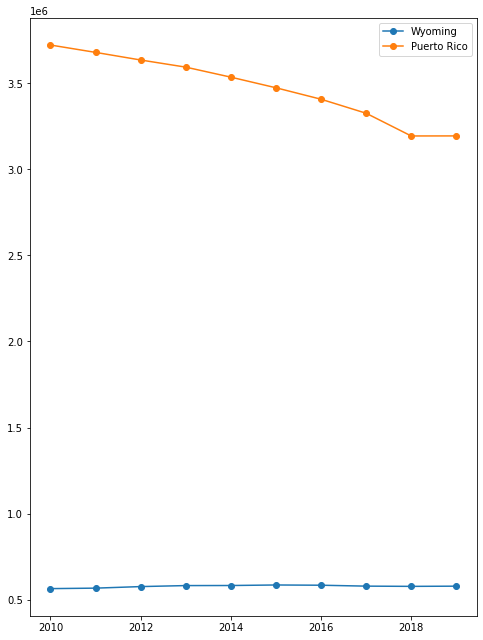

In [27]:
#Constructed figure size and set years and the x axis]
plt.figure(figsize=(8,11))
years=[2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]

#Use the .loc[] to find the position of the state on the chart, then call for the the population count from years 2010 to 2019. 
#The population count that is pulled from set range of years will be the y axis
Wyoming=df_pop2.loc[51,'2010':'2019']
Puerto_Rico=df_pop2.loc[52,'2010':'2019']

#plotting the line graph x=years, y=population  count from the years 2010-2019, Label='state', marker shows the shape of the point where the population is at 
plt.plot(years,Wyoming,label='Wyoming',marker='o')
plt.plot(years,Puerto_Rico,label='Puerto Rico',marker='o')

plt.legend()

In [28]:
# Print columns States and the population count for 2019
df_pop3=df_pop2[['States','2019']]

#This will drop the United States row from the dataframe
df_pop3.drop([0],axis=0, inplace=True)

#Reset the index after droping United States row
df_pop3=df_pop3.reset_index()

#This will drop the old index column
df_pop3.drop('index',axis=1, inplace=True)
df_pop3

/opt/tljh/user/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,States,2019
0,Alabama,4903185.0
1,Alaska,731545.0
2,Arizona,7278717.0
3,Arkansas,3017804.0
4,California,39512223.0
5,Colorado,5758736.0
6,Connecticut,3565287.0
7,Delaware,973764.0
8,District of Columbia,705749.0
9,Florida,21477737.0


In [29]:
df_pop3

,States,2019
0,Alabama,4903185.0
1,Alaska,731545.0
2,Arizona,7278717.0
3,Arkansas,3017804.0
4,California,39512223.0
5,Colorado,5758736.0
6,Connecticut,3565287.0
7,Delaware,973764.0
8,District of Columbia,705749.0
9,Florida,21477737.0


In [30]:
df_obesity

,States,Obese Adults in Percentage (2020)
0,Alabama,36.3
1,Alaska,34.2
2,American Samoa,75.0
3,Arizona,29.5
4,Arkansas,35.0
5,California,25.1
6,Colorado,22.6
7,Connecticut,26.9
8,Delaware,31.8
9,District of Columbia,23.0


In [31]:
#Combinind the Two different dataframes from df_obesity and df_pop3. The merge dataframes will be based on the States column
#The how ='outer' will combine everything from both dataframes
merged=pd.merge(df_obesity,df_pop3,on='States',how='outer')
merged=merged.fillna(0.0)
merged

,States,Obese Adults in Percentage (2020),2019
0,Alabama,36.3,4903185.0
1,Alaska,34.2,731545.0
2,American Samoa,75.0,0.0
3,Arizona,29.5,7278717.0
4,Arkansas,35.0,3017804.0
5,California,25.1,39512223.0
6,Colorado,22.6,5758736.0
7,Connecticut,26.9,3565287.0
8,Delaware,31.8,973764.0
9,District of Columbia,23.0,705749.0


In [32]:
#A new column will be created based on the calculation of Obese Adults in Percentage(2020)/100 times population count of 2019=Pop.Count of Obese People
merged['Pop. Count of Obese People ']= (merged['Obese Adults in Percentage (2020)']/100)*merged['2019']


In [33]:
merged

,States,Obese Adults in Percentage (2020),2019,Pop. Count of Obese People
0,Alabama,36.3,4903185.0,1779856.155
1,Alaska,34.2,731545.0,250188.390
2,American Samoa,75.0,0.0,0.000
3,Arizona,29.5,7278717.0,2147221.515
4,Arkansas,35.0,3017804.0,1056231.400
5,California,25.1,39512223.0,9917567.973
6,Colorado,22.6,5758736.0,1301474.336
7,Connecticut,26.9,3565287.0,959062.203
8,Delaware,31.8,973764.0,309656.952
9,District of Columbia,23.0,705749.0,162322.270


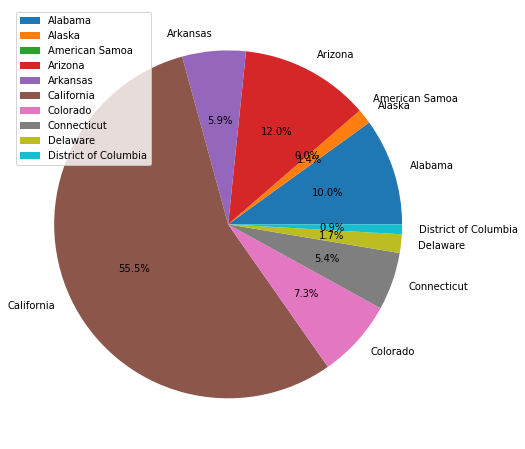

In [34]:
# The pie charts represents the number of obese people are in each state. Showing which state has the most obese population
values=([1779856.155,250188.390,0.000,2147221.515,1056231.400,9917567.973,1301474.336,959062.203,309656.952,162322.270])
states=['Alabama','Alaska','American Samoa','Arizona','Arkansas','California','Colorado','Connecticut','Delaware','District of Columbia']

#autopct displays the percent value using a string format
plt.figure(figsize=(17,8))
plt.pie(values, labels=states,autopct='%1.1f%%')
plt.legend()

In [35]:
merged.loc[19]

States                                  Kentucky
Obese Adults in Percentage (2020)           34.3
2019                                 4.46767e+06
Pop. Count of Obese People           1.53241e+06
Name: 19, dtype: object

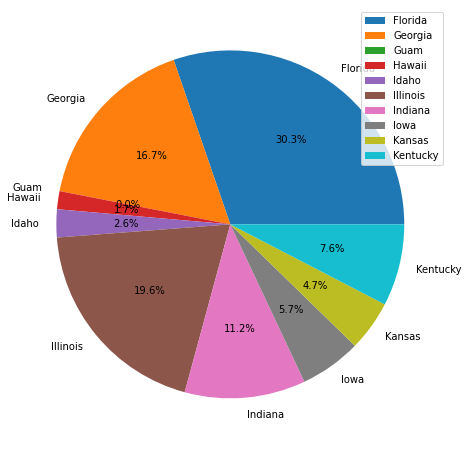

In [36]:

# The pie charts represents the number of obese people are in each state. Showing which state has the most obese population
values=([6099677.308,3355105.668,0,336978,523610,3940936.331,2262025.584,1148445.480,943914,1532411.839])
states=['Florida','Georgia','Guam','Hawaii','Idaho','Illinois','Indiana','Iowa','Kansas','Kentucky']

#autopct displays the percent value using a string format
plt.figure(figsize=(17,8))
plt.pie(values, labels=states,autopct='%1.1f%%')
plt.legend()

In [37]:
merged.loc[29]

States                                  Nebraska
Obese Adults in Percentage (2020)           32.8
2019                                 1.93441e+06
Pop. Count of Obese People                634486
Name: 29, dtype: object

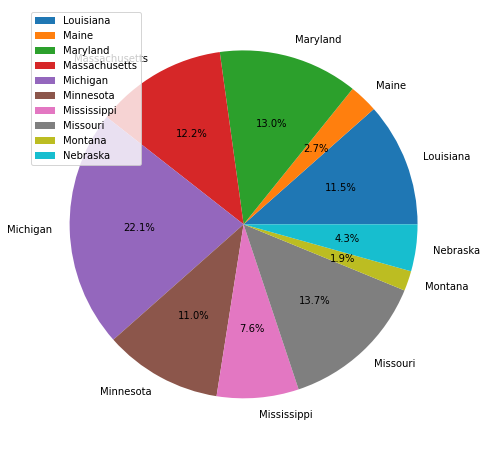

In [38]:
# The pie charts represents the number of obese people are in each state. Showing which state has the most obese population

values=([1682863.428,391166,1892297.840,1785158.277,3225754.811,1601655.488,1110103.577,1994664.100,270401,634486])
states=('Louisiana','Maine','Maryland','Massachusetts','Michigan','Minnesota','Mississippi','Missouri','Montana','Nebraska')

#autopct displays the percent value using a string format
plt.figure(figsize=(17,8))
plt.pie(values, labels=states,autopct='%1.1f%%')
plt.legend()

In [39]:
merged.loc[39]

States                                  Oklahoma
Obese Adults in Percentage (2020)           36.5
2019                                 3.95697e+06
Pop. Count of Obese People           1.44429e+06
Name: 39, dtype: object

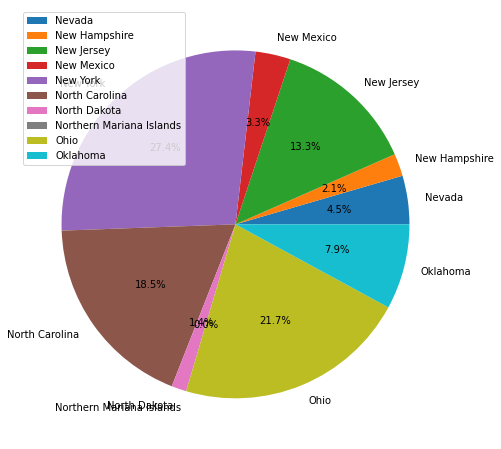

In [40]:

# The pie charts represents the number of obese people are in each state. Showing which state has the most obese population
values=([822402,382079,2424837.870,595499,4999565.177,3366674.964,253005,0,3950915.800,1444294.415])
states=('Nevada','New Hampshire','New Jersey','New Mexico','New York', 'North Carolina','North Dakota','Northern Mariana Islands','Ohio','Oklahoma')

#autopct displays the percent value using a string format
plt.figure(figsize=(17,8))
plt.pie(values, labels=states,autopct='%1.1f%%')
plt.legend()

In [41]:
merged.loc[49]

States                               Vermont
Obese Adults in Percentage (2020)       27.6
2019                                  623989
Pop. Count of Obese People            172221
Name: 49, dtype: object

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


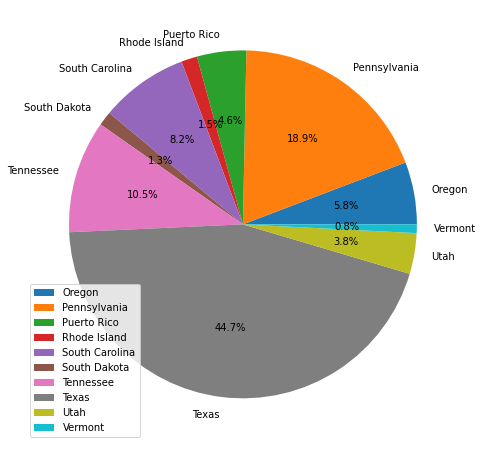

In [42]:
# The pie charts represents the number of obese people are in each state. Showing which state has the most obese population

values=[(1240014.678,4045428.524,980464,317808,1755711.474,282206,2239969.072,9568640.730,811107,172221)]
states=('Oregon','Pennsylvania','Puerto Rico','Rhode Island','South Carolina','South Dakota','Tennessee','Texas','Utah','Vermont')

#autopct displays the percent value using a string format
plt.figure(figsize=(17,8))
plt.pie(values, labels=states,autopct='%1.1f%%')
plt.legend()

In [43]:
merged.loc[55]

States                               Wyoming
Obese Adults in Percentage (2020)       28.8
2019                                  578759
Pop. Count of Obese People            166683
Name: 55, dtype: object

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


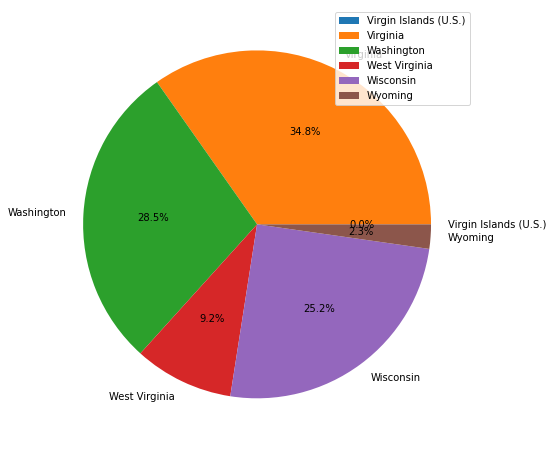

In [44]:

# The pie charts represents the number of obese people are in each state. Showing which state has the most obese population
values=[(0,2569191.219,2109325.361,682808,1863178.880,166683)]
states=('Virgin Islands (U.S.)','Virginia','Washington','West Virginia','Wisconsin','Wyoming')

#autopct displays the percent value using a string format
plt.figure(figsize=(17,8))
plt.pie(values, labels=states,autopct='%1.1f%%')
plt.legend()

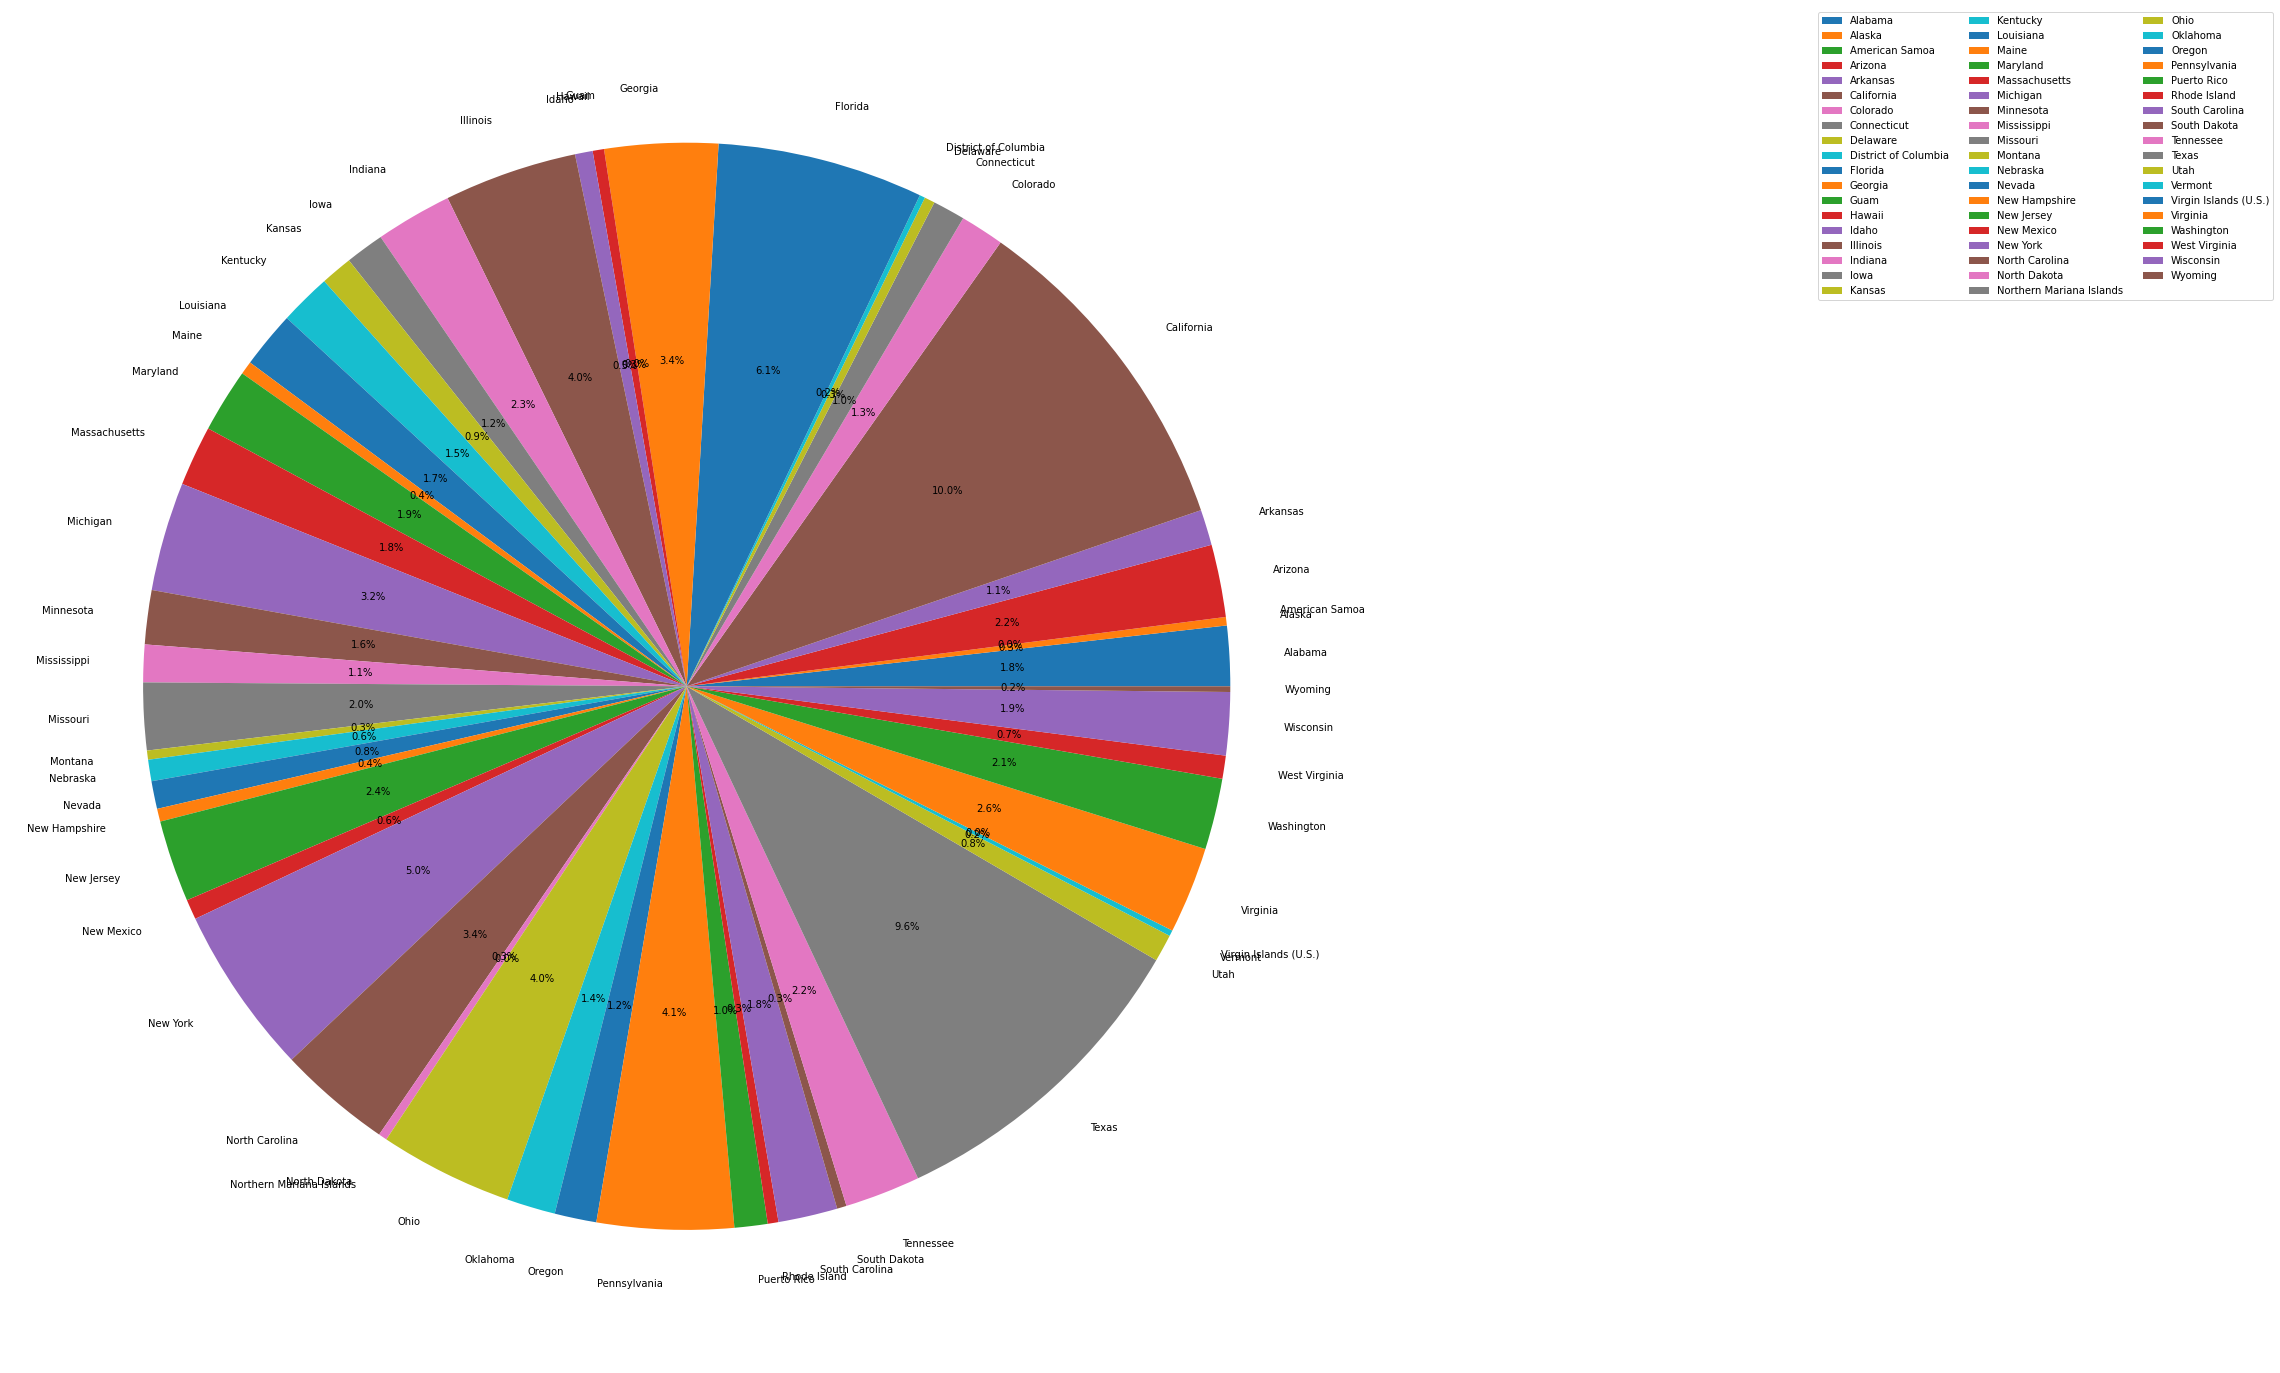

In [113]:
# This pie chart displays United States and it territories showing the states population of obese people
values=merged['Pop. Count of Obese People ']
state_labels=merged['States']


plt.figure(figsize=(25,25))
plt.pie(values, labels=state_labels,autopct='%1.1f%%')
plt.legend(loc="upper center", bbox_to_anchor=(1.5, 1), ncol=3)


In [93]:
#Prints all the columns for by_state dataframe
by_state.columns

Index(['States', 'death', 'deathConfirmed', 'deathIncrease', 'deathProbable',
       'hospitalized', 'hospitalizedCumulative', 'hospitalizedCurrently',
       'hospitalizedIncrease', 'inIcuCumulative', 'inIcuCurrently', 'negative',
       'negativeIncrease', 'negativeTestsAntibody',
       'negativeTestsPeopleAntibody', 'negativeTestsViral',
       'onVentilatorCumulative', 'onVentilatorCurrently', 'positive',
       'positiveCasesViral', 'positiveIncrease', 'positiveScore',
       'positiveTestsAntibody', 'positiveTestsAntigen',
       'positiveTestsPeopleAntibody', 'positiveTestsPeopleAntigen',
       'positiveTestsViral', 'recovered', 'totalTestEncountersViral',
       'totalTestEncountersViralIncrease', 'totalTestResults',
       'totalTestResultsIncrease', 'totalTestsAntibody', 'totalTestsAntigen',
       'totalTestsPeopleAntibody', 'totalTestsPeopleAntigen',
       'totalTestsPeopleViral', 'totalTestsPeopleViralIncrease',
       'totalTestsViral', 'totalTestsViralIncrease'],
    

In [56]:
#Use merge function to combine, merged dataframe and by_state dataframe to make new dataframe called merged2. 
#The dataframes are merged by the 'States' column

merged2=pd.merge(merged,by_state,on='States', how='outer')
merged2.fillna(0.0)

,States,Obese Adults in Percentage (2020),2019,Pop. Count of Obese People,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,Alabama,36.3,4903185.0,1779856.155,1038241.0,897681.0,10148.0,136027.0,6133645.0,6133645.0,...,3.662777e+08,2323788.0,0.0,0.0,15188638.0,0.0,3.662777e+08,2323788.0,0.000000e+00,0.0
1,Alaska,34.2,731545.0,250188.390,31486.0,14454.0,305.0,0.0,157626.0,157626.0,...,2.082177e+08,1731620.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,2.082177e+08,1731628.0
2,American Samoa,75.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.0
3,Arizona,29.5,7278717.0,2147221.515,1918434.0,1710791.0,16328.0,159627.0,7425807.0,7425807.0,...,9.190266e+08,7908072.0,580569.0,0.0,86926215.0,0.0,5.293555e+08,3842945.0,9.190266e+08,7908105.0
4,Arkansas,35.0,3017804.0,1056231.400,601561.0,468918.0,5319.0,82996.0,2017792.0,2017792.0,...,3.685376e+08,2736436.0,0.0,512573.0,0.0,34473042.0,0.000000e+00,0.0,3.685376e+08,2736442.0
5,California,25.1,39512223.0,9917567.973,5733089.0,0.0,54124.0,0.0,0.0,0.0,...,5.833385e+09,49645499.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,5.833385e+09,49646014.0
6,Colorado,22.6,5758736.0,1301474.336,908462.0,748037.0,5989.0,135029.0,3478740.0,3478740.0,...,7.034087e+08,6415123.0,59136195.0,0.0,0.0,0.0,3.669939e+08,2616541.0,0.000000e+00,0.0
7,Connecticut,26.9,3565287.0,959062.203,1584666.0,1217530.0,7704.0,281155.0,3575391.0,3575391.0,...,7.782720e+08,6520363.0,0.0,21296260.0,0.0,0.0,0.000000e+00,0.0,7.782720e+08,6520366.0
8,Delaware,31.8,973764.0,309656.952,228375.0,202801.0,1473.0,25574.0,0.0,0.0,...,1.745888e+08,1431942.0,0.0,0.0,0.0,0.0,9.695583e+07,633424.0,0.000000e+00,0.0
9,District of Columbia,23.0,705749.0,162322.270,207067.0,0.0,1030.0,0.0,0.0,0.0,...,1.546670e+08,1261357.0,0.0,0.0,0.0,0.0,6.874351e+07,441942.0,0.000000e+00,0.0


In [48]:
#Listing out the columns and the type of data each column has
merged2.dtypes

States                                object
Obese Adults in Percentage (2020)    float64
2019                                 float64
Pop. Count of Obese People           float64
death                                float64
deathConfirmed                       float64
deathIncrease                        float64
deathProbable                        float64
hospitalized                         float64
hospitalizedCumulative               float64
hospitalizedCurrently                float64
hospitalizedIncrease                 float64
inIcuCumulative                      float64
inIcuCurrently                       float64
negative                             float64
negativeIncrease                     float64
negativeTestsAntibody                float64
negativeTestsPeopleAntibody          float64
negativeTestsViral                   float64
onVentilatorCumulative               float64
onVentilatorCurrently                float64
positive                             float64
positiveCa

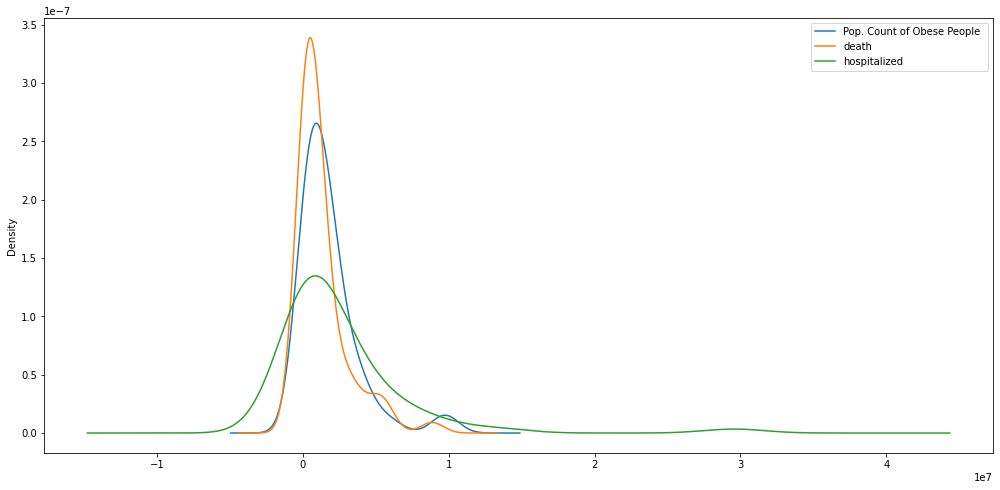

In [123]:
#kernal density estimated help visualize distribution . 
#This shows distribution of Pop. Count of Obese people , death, and people hostipiatlized
#KDE predicts the probability of different values for a continous variable
merged2[['Pop. Count of Obese People ','death','hospitalized']].plot.kde(figsize=(17,8))



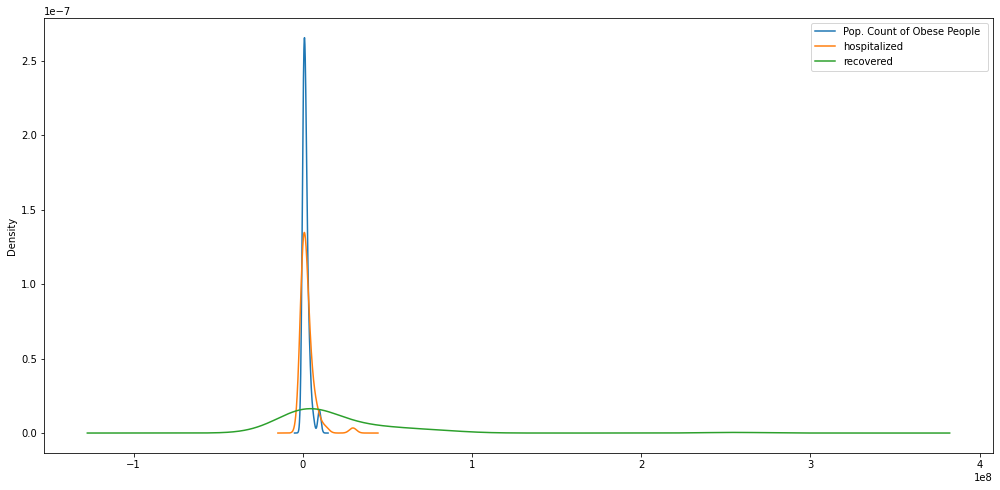

In [125]:
merged2[['Pop. Count of Obese People ','hospitalized','recovered']].plot.kde(figsize=(17,8))

In [59]:
#for loop used to show how the each column is typed correctly and formatted

for col in merged2.columns:
    print("'{}'".format(col))

'States'
'Obese Adults in Percentage (2020)'
'2019'
'Pop. Count of Obese People '
'death'
'deathConfirmed'
'deathIncrease'
'deathProbable'
'hospitalized'
'hospitalizedCumulative'
'hospitalizedCurrently'
'hospitalizedIncrease'
'inIcuCumulative'
'inIcuCurrently'
'negative'
'negativeIncrease'
'negativeTestsAntibody'
'negativeTestsPeopleAntibody'
'negativeTestsViral'
'onVentilatorCumulative'
'onVentilatorCurrently'
'positive'
'positiveCasesViral'
'positiveIncrease'
'positiveScore'
'positiveTestsAntibody'
'positiveTestsAntigen'
'positiveTestsPeopleAntibody'
'positiveTestsPeopleAntigen'
'positiveTestsViral'
'recovered'
'totalTestEncountersViral'
'totalTestEncountersViralIncrease'
'totalTestResults'
'totalTestResultsIncrease'
'totalTestsAntibody'
'totalTestsAntigen'
'totalTestsPeopleAntibody'
'totalTestsPeopleAntigen'
'totalTestsPeopleViral'
'totalTestsPeopleViralIncrease'
'totalTestsViral'
'totalTestsViralIncrease'


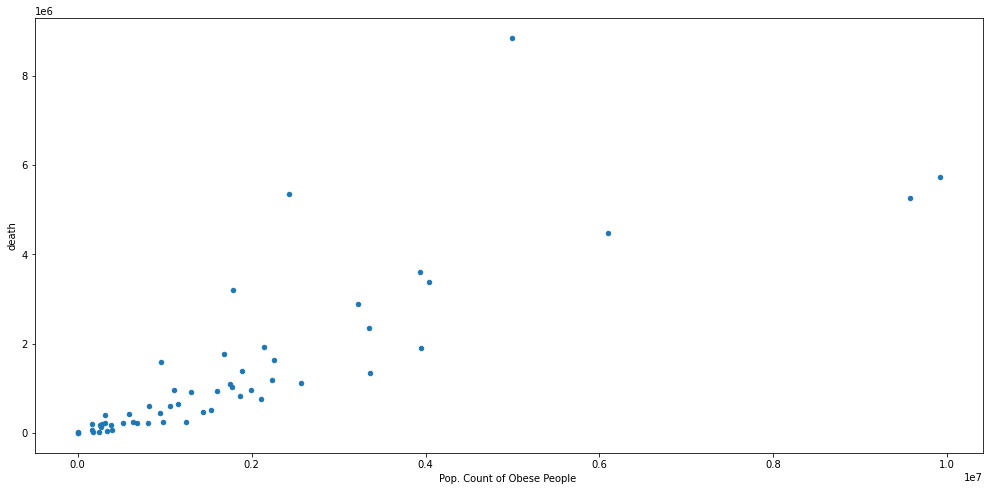

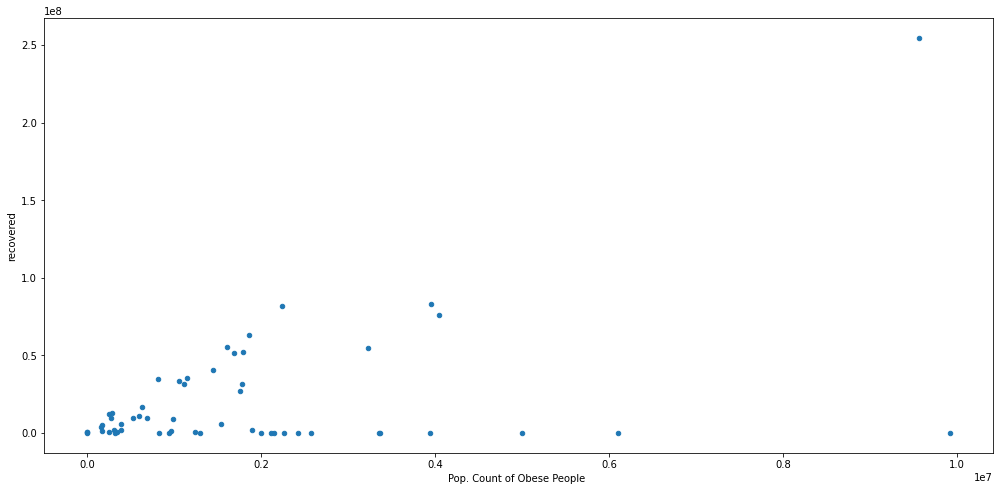

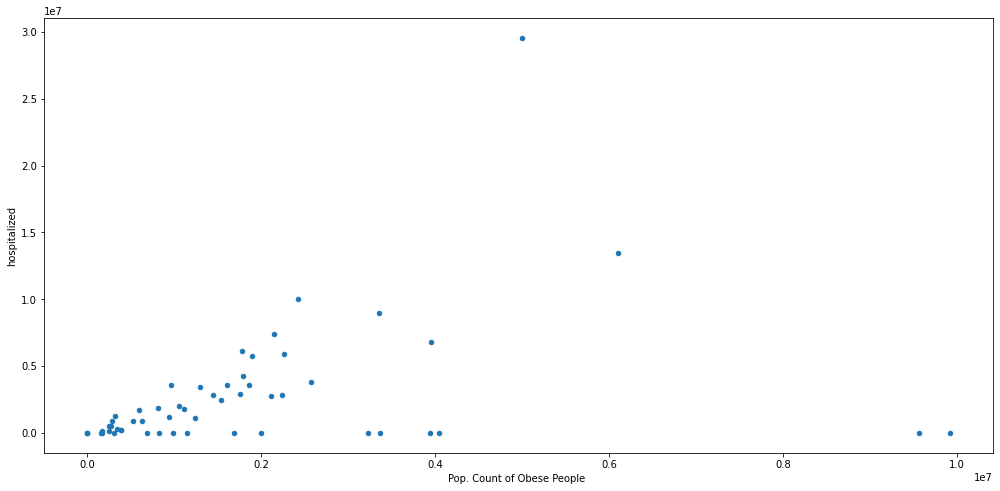

In [131]:
#Used a scatterplot graph to show correlations between the variables that have been selected, 
#such Pop. Count of Obese People vs death, Pop. Count of Obese People vs recovered, and Pop. Count of Obese People vs hospitalized


merged2.plot.scatter(x='Pop. Count of Obese People ',y='death',figsize=(17,8))
merged2.plot.scatter(x='Pop. Count of Obese People ',y='recovered',figsize=(17,8))
merged2.plot.scatter(x='Pop. Count of Obese People ',y='hospitalized',figsize=(17,8))

In [126]:
#Correlation test is performed between all 4 variables 'Pop. Count of Obese People ','death','recovered', and 'hospitalized'
corr_merged2=merged2[['Pop. Count of Obese People ','death','recovered','hospitalized']]

In [127]:
#print out the correaltion test. This shows that states with the higher obesity count had higher death counts from Covid19
#Hospitalizations and Obesity had a low correlation. 
corr_merged2.corr()

,Pop. Count of Obese People,death,recovered,hospitalized
Pop. Count of Obese People,1.000000,0.815298,0.484997,0.330207
death,0.815298,1.000000,0.282754,0.675111
recovered,0.484997,0.282754,1.000000,-0.080401
hospitalized,0.330207,0.675111,-0.080401,1.000000


In [135]:
%%bash
git pull
git add final_assignment.ipynb
git commit -a -m "Submitting the final assignment"
git push

Already up to date.
[main 105db15] Submitting the final assignment
 1 file changed, 20 insertions(+), 2 deletions(-)


fatal: pathspec 'final_assignment.ipynb' did not match any files
To github.com:majdhamed/hds5210-2021.git
   61f5aca..105db15  main -> main
